In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1073038985.py, line 10)

In [3]:
from rec import Rec
import torch
model = Rec()
model.load_state_dict(torch.load('model/...'))

FileNotFoundError: [Errno 2] No such file or directory: 'model/...'

C:\Users\Acer\AppData\Local\Temp\ipykernel_2748\1890151242.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dat = torch.tensor(load_example('data/wavs/LJ037-0171.wav'))


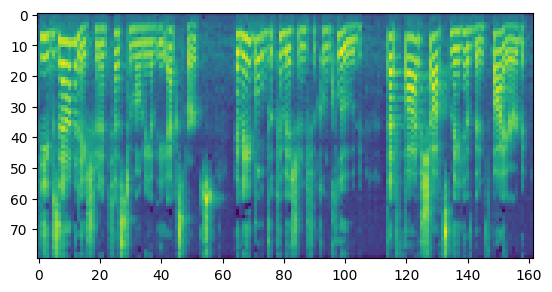

In [5]:
from rec import load_example, CHARSET
val = torch.tensor(load_example('data/wavs/LJ037-0171.wav'))
imshow(torch.log10(val).T)
mguess = model(val[:, None])
imshow(mguess.detach().numpy()[0])
pp = ''.join([CHARSET[c-1] for c in mguess[:, 0, :].argmax(dim=1) if c != 0])
print(pp)

In [2]:
import wave
import numpy as np

wavefile = wave.open("data/wavs/LJ001-0123.wav")
length = wavefile.getnframes()
print(f"{length} frames")
wavedata = np.frombuffer(wavefile.readframes(length), np.int16)
print(len(wavedata))
print(wavedata[0:10])

81309 frames
81309
[-14 -49   0  27 -17 -49  -1  37 -36 -36]


torch.Size([1, 165021]) 22050
torch.Size([1, 80, 645])


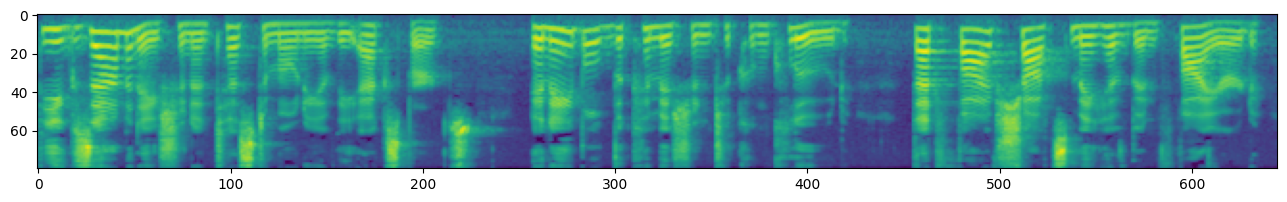

In [12]:
import torchaudio
waveform, sample_rate = torchaudio.load('data/wavs/LJ037-0171.wav', normalize=True)
print(waveform.shape, sample_rate)
transform = torchaudio.transforms.MelSpectrogram(sample_rate, n_fft=1024, win_length=1024, 
                                                 hop_length=256, n_mels=80)
mel_specgram = transform(waveform)
print(mel_specgram.shape)
figsize(16, 16)
imshow(np.log10(mel_specgram[0]))

In [6]:
from rec import train
train()

ImportError: cannot import name 'train' from 'rec' (c:\fun\ForensicsChallenge2023_team6\audio_detection\speech_recognition_fromscratch\rec.py)

In [12]:
from rec import get_dataloader
x, y, xl, yl = next(iter(get_dataloader(1024)))

x.shape, y.shape, xl, yl

got metadata 12492


ValueError: too many values to unpack (expected 4)

In [13]:
dset = LJSpeech()
imshow(dset[0][0][0])

NameError: name 'LJSpeech' is not defined

In [ ]:
from rec import LJSpeech
from tqdm.auto import trange

dset = LJSpeech()
print(len(dset))
mm = 0
nn = 0
nns = []
for i in trange(len(dset)):
    x, y = dset[i]
    mm = max(y.shape[2], mm)
    nn = max(x.shape[1], nn)
    nns.append(y.shape[1])
    print(x.shape, y.shape, mm, nn)

In [ ]:
len([x[1] for x in dset.meta if len(x[1]) < 150], len(dset.meta))

In [4]:
import torchaudio
waveform, sample_rate = torchaudio.load('data/wavs/LJ037-0171.wav', normalize=True)
print(waveform.shape, sample_rate)

transform = torchaudio.transforms.MelSpectrogram(sample_rate, n_fft=1024, win_length=1024, 
                                                 hop_length=256, n_mels=80)
mel_specgram = transform(waveform)
print(mel_specgram.shape)

torch.Size([1, 165021]) 22050
torch.Size([1, 80, 645])


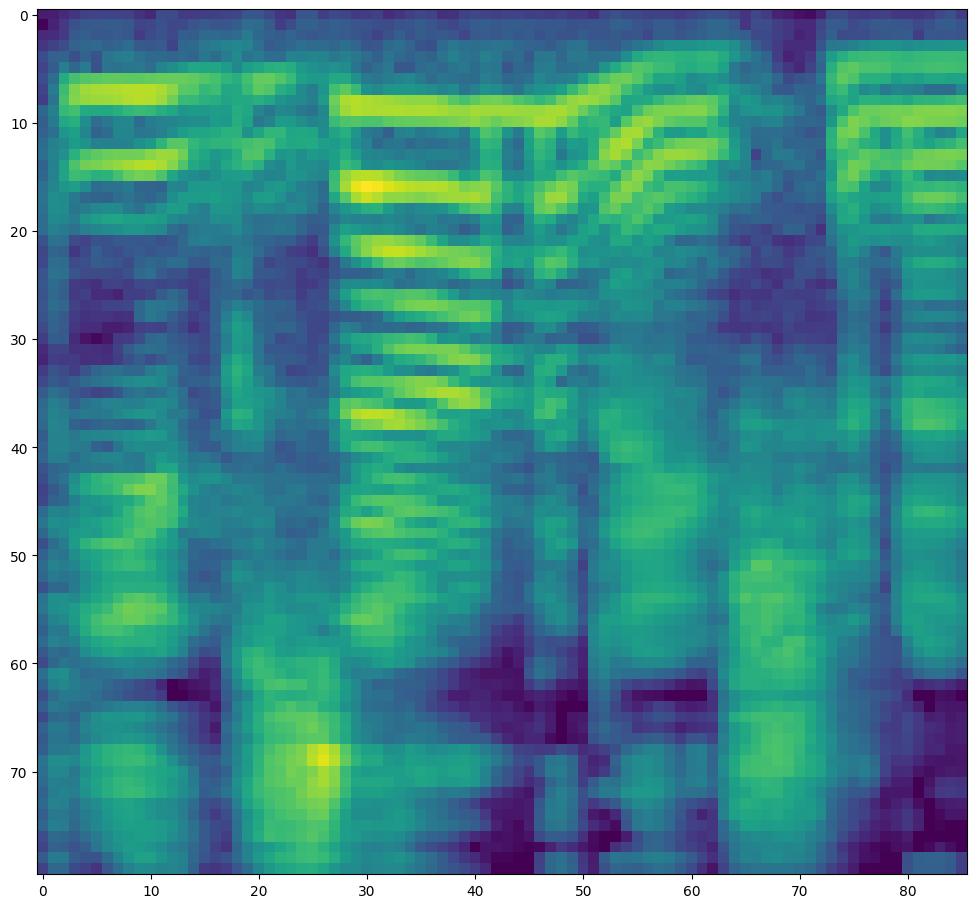

In [8]:
import librosa
figsize(12, 12)
imshow(librosa.power_to_db(mel_specgram[0])[:, 0:86])

C:\Users\Acer\AppData\Local\Temp\ipykernel_13592\2723768346.py:2: RuntimeWarning: invalid value encountered in log10
  imshow(10*np.log10(librosa.power_to_db(mel_specgram[0])))


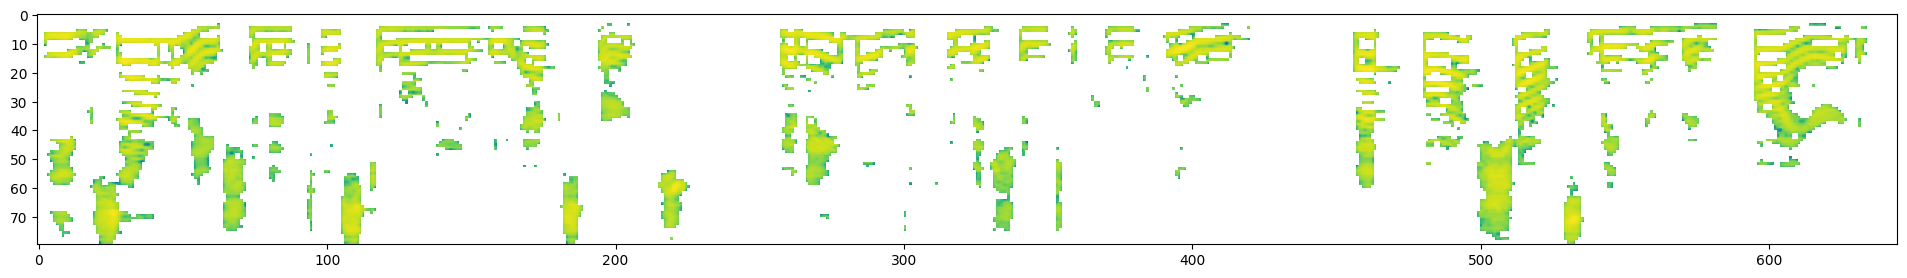

In [9]:
figsize(24, 24)
imshow(10*np.log10(librosa.power_to_db(mel_specgram[0])))

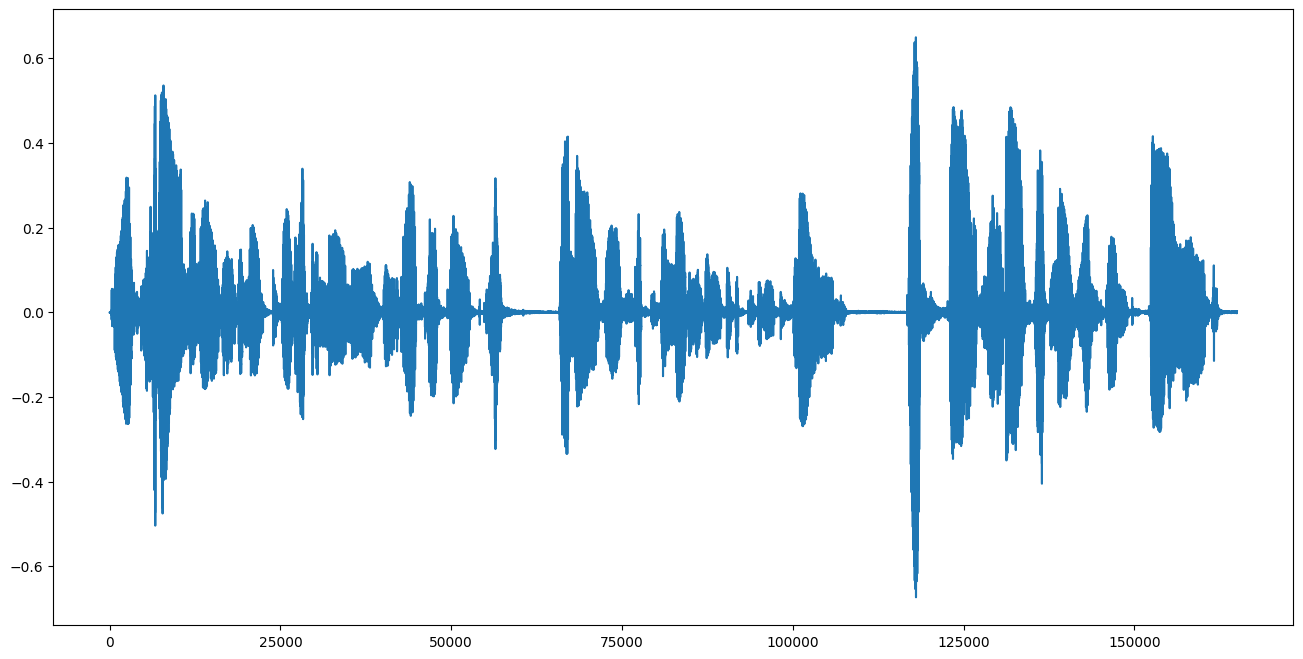

In [10]:
figsize(16, 8)
plot(waveform[0])